In [1]:
from ripser import ripser
from persim import plot_diagrams
from numpy import sin,cos, dot
import numpy as np
from numpy import pi,cos,sin
import matplotlib.pyplot as plt
import random
from math import dist

In [2]:
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output

def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = {}
    for pair in H1: 
        d[tuple(pair)] = pair[1] - pair[0] # finding lengths of intervals in H1
    sorted_d = sorted(d.items(), key=lambda x:x[1], reverse = True)  # sorting from longest to shortest intervals
    sorted_dict = dict(sorted_d)
    first5pairs = {k: sorted_dict[k] for k in list(sorted_dict.keys())[:5]}
    return first5pairs

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)
    
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

def graph_continuous(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    x_points = []
    y_points = []
    colors = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i]) 
        colors.append(color)
        x_points.append(X[i])
        y_points.append(Y[i])

        
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors, s = .1)
    plt.show()
    
    
def view_window_continuous(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

# C1

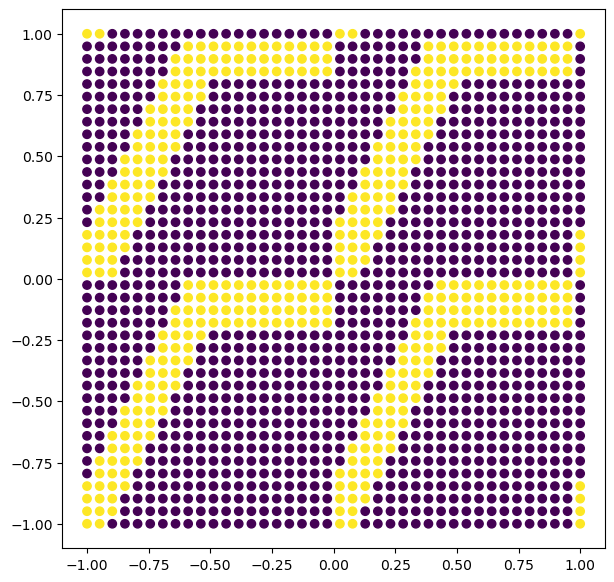

In [5]:
def slant(x,y):
    ret = 0
    if (0 <= x % 1 < 0.5) and (x % 1 - 0.1 <= 0.5* (y % 1) <= x%1 + 0.1):
        ret = 1
    if y % 1 > 0.8 and 0.5 < x % 1 < 1:
        ret = 1
    return ret

view_window_continuous(image_function = slant, num_pixels= 40, window_size=2)

In [3]:
def generate_isom_track(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append((a[i], b[i], isom(a[i], b[i], theta[i])))
        isos_inv.append((a[i], b[i], isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])))
    return isos_inv


def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors


def trans_and_colors(pixels, isos_inv, image_function):
    vectors = np.zeros((len(isos_inv), len(pixels)+2))
    for i in range(len(isos_inv)):
        colors = new_colors(pixels, isos_inv[i][2], image_function)
        colors.insert(0, isos_inv[i][1])
        colors.insert(0, isos_inv[i][0])
        vectors[i] = colors
    return vectors


def dist_penalize(vector1, vector2, a, b, scalar):
    #trans_dist = dist((vector1[0]%x_length, vector1[1]%y_length), (vector2[0]%x_length, vector2[1]%y_length))
    trans_dist_x = sin(pi * dist([vector1[0]%a], [vector2[0]%a])/ a)
    trans_dist_y = sin(pi * dist([vector1[1]%b], [vector2[1]%b])/ b)
    trans_dist = (trans_dist_x ** 2 + trans_dist_y ** 2) ** 0.5
    ret = (1 + scalar * trans_dist) * dist(vector1[2:], vector2[2:])
    return ret


def matrix_of_distances_penalize(pixels, isos_inv, image_function, a, b, scalar):
    vectors = trans_and_colors(pixels, isos_inv, image_function)
    M = np.zeros((len(isos_inv), len(isos_inv)))
    for i in range(len(isos_inv)):
        for j in range(len(isos_inv)):
            M[i][j] = dist_penalize(vectors[i],vectors[j],a,b, scalar)
    return M

def view_matrix_penalize(image_function, num_pixels, window_size, a, b, scalar, n_isos, x_translate, y_translate):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom_track(n_isos, x_translate, y_translate)
    M = matrix_of_distances_penalize(pixels, isos_inv, image_function, a, b, scalar)
    return M

### First Idea: 
Suppose we have an image $I$ with fundamental domain of size $a \times b$ and a lens size of $n\times n$ pixels. For $x\in \mathbb{R}$, let $x\% a$ denote the remainder of $x/a$. Given two isometries $f= (x_1, y_1, \theta_1)$ and $g= (x_2,y_2, \theta_2)$ and the image under these isometries $f(I), g(I)\in\mathbb{R}^{n\times n}$, we define the distance between $f(I)$ and $g(I)$ to be $[1 + k \cdot d_1(f,g)]\cdot d_2( f(I), g(I))$ where $k$ is a scalar, $d_2$ is eudlidean distance, and

$$d_1(f,g) = \left[\left(\sin\left(\frac{\pi \cdot |x_2\% a-x_1\% a|}{a}\right)\right)^2 + \left(\sin\left(\frac{\pi \cdot |y_2\%b-y_1\%b|}{b}\right)\right)^2\right]^{1/2}$$

Note that when the $x$-coordinates of $f$ and $g$ are $a/2$ apart after modding by $a$, the term $\sin\left(\frac{\pi \cdot |x_2\% a-x_1\% a|}{a}\right)$ is maximized.


In [7]:
pixels = get_pixels(40,1)
i1a = 1
i2a = 10.5
isom1 = (i1a, 0, isom(a= i1a,b=0,theta=pi))
isom2 = (i2a, 0 , isom(a= i1a,b=0,theta=0))
colors1 = new_colors(pixels, isom1[2], image_function=slant)
colors1.insert(0, isom1[1])
colors1.insert(0, isom1[0])
colors2 = new_colors(pixels, isom2[2], image_function=slant)
colors2.insert(0, isom2[1])
colors2.insert(0, isom2[0])
dist_penalize(colors1, colors2, a=1, b=1, scalar = 1)

52.15361924162119

In [8]:
dist(colors1[2:], colors2[2:])

26.076809620810597

In [9]:
trans_dist_x = sin(pi * dist([colors1[0]%1], [colors2[0]%1])/ 1)
trans_dist_y = sin(pi * dist([colors1[1]%1], [colors2[1]%1])/ 1)
trans_dist = (trans_dist_x ** 2 + trans_dist_y ** 2) ** 0.5
trans_dist

1.0

In [70]:
M = view_matrix_penalize(image_function = slant, num_pixels = 30 , window_size = 3, a = 1, b = 1, scalar = -0.5, n_isos = 1000, x_translate= 10 , y_translate=10)
M

array([[ 0.        ,  7.72776305,  5.93846825, ..., 10.04111887,
         9.76486707, 10.32907006],
       [ 7.72776305,  0.        , 13.0827303 , ...,  8.90253521,
         6.52066714,  9.66338301],
       [ 5.93846825, 13.0827303 ,  0.        , ...,  9.51183391,
         8.6135884 ,  8.58288467],
       ...,
       [10.04111887,  8.90253521,  9.51183391, ...,  0.        ,
        11.75731106,  6.94346397],
       [ 9.76486707,  6.52066714,  8.6135884 , ..., 11.75731106,
         0.        ,  9.34977703],
       [10.32907006,  9.66338301,  8.58288467, ...,  6.94346397,
         9.34977703,  0.        ]])

In [1]:
# this wont run for some reason

'''
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)
'''

'\noutput = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)\nplot_dgms(output)\n'

In [10]:
M = view_matrix_penalize(image_function = slant, num_pixels = 30 , window_size = 3, a = 1, b = 1, scalar = -0.2, n_isos = 1000, x_translate= 10 , y_translate=10)
M

array([[ 0.        , 15.45520479, 14.00047559, ..., 16.62882084,
        14.23156712, 16.40214333],
       [15.45520479,  0.        , 15.6792539 , ..., 14.24105318,
        15.94107069, 14.36743026],
       [14.00047559, 15.6792539 ,  0.        , ..., 13.66820212,
        18.17628293, 14.00898071],
       ...,
       [16.62882084, 14.24105318, 13.66820212, ...,  0.        ,
        14.54203755, 18.4487891 ],
       [14.23156712, 15.94107069, 18.17628293, ..., 14.54203755,
         0.        , 14.44581816],
       [16.40214333, 14.36743026, 14.00898071, ..., 18.4487891 ,
        14.44581816,  0.        ]])

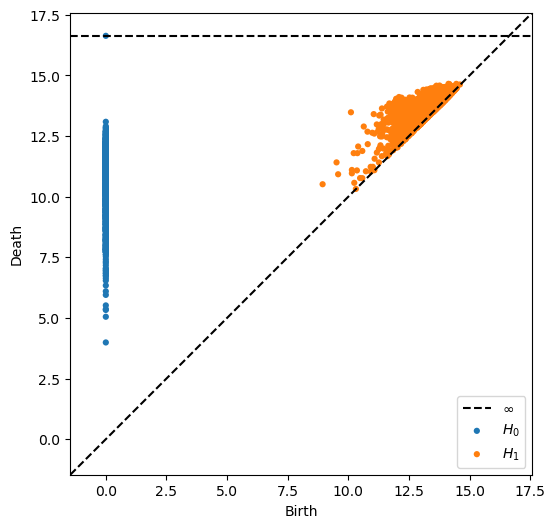

In [11]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [12]:
persistent_H1_intervals(output)

{(10.10969352722168, 13.482804298400879): 3.373110771179199,
 (11.049670219421387, 13.407125473022461): 2.357455253601074,
 (10.63868522644043, 12.89525318145752): 2.25656795501709,
 (11.388679504394531, 13.640963554382324): 2.252284049987793,
 (11.69318962097168, 13.84692096710205): 2.153731346130371}

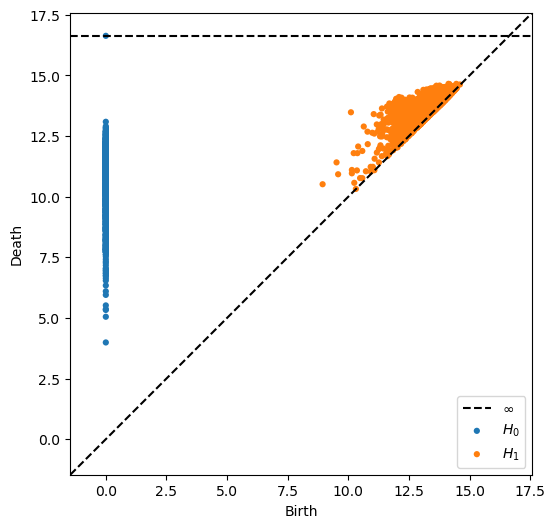

In [13]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [14]:
persistent_H1_intervals(output)

{(10.10969352722168, 13.482804298400879): 3.373110771179199,
 (11.049670219421387, 13.407125473022461): 2.357455253601074,
 (10.63868522644043, 12.89525318145752): 2.25656795501709,
 (11.388679504394531, 13.640963554382324): 2.252284049987793,
 (11.69318962097168, 13.84692096710205): 2.153731346130371}

In [15]:
M = view_matrix_penalize(image_function = slant, num_pixels = 30 , window_size = 3, a = 1, b = 1, scalar = 0, n_isos = 1000, x_translate= 10 , y_translate=10)
M

array([[ 0.        , 19.        , 18.68154169, ..., 18.65475811,
        19.57038579, 17.94435844],
       [19.        ,  0.        , 18.60107524, ..., 19.62141687,
        20.14944168, 19.26136028],
       [18.68154169, 18.60107524,  0.        , ..., 21.33072901,
        18.97366596, 19.        ],
       ...,
       [18.65475811, 19.62141687, 21.33072901, ...,  0.        ,
        19.62141687, 18.81488772],
       [19.57038579, 20.14944168, 18.97366596, ..., 19.62141687,
         0.        , 18.1934054 ],
       [17.94435844, 19.26136028, 19.        , ..., 18.81488772,
        18.1934054 ,  0.        ]])

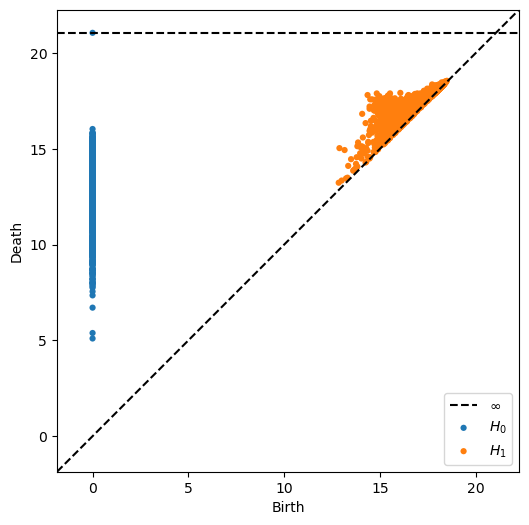

In [16]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [17]:
persistent_H1_intervals(output)

{(14.352700233459473, 17.804492950439453): 3.4517927169799805,
 (14.491376876831055, 17.57839584350586): 3.0870189666748047,
 (14.832396507263184, 17.8885440826416): 3.056147575378418,
 (14.59451961517334, 17.57839584350586): 2.9838762283325195,
 (14.966629981994629, 17.748239517211914): 2.781609535217285}

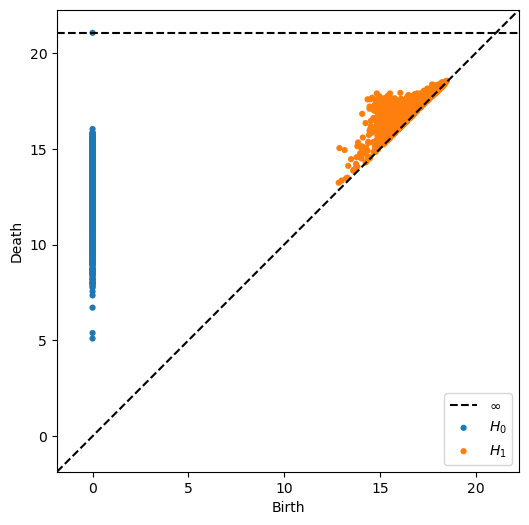

In [18]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [19]:
persistent_H1_intervals(output)

{(14.352700233459473, 17.57839584350586): 3.2256956100463867,
 (14.491376876831055, 17.57839584350586): 3.0870189666748047,
 (14.59451961517334, 17.66352081298828): 3.0690011978149414,
 (14.832396507263184, 17.8885440826416): 3.056147575378418,
 (14.966629981994629, 17.748239517211914): 2.781609535217285}

In [20]:
M = view_matrix_penalize(image_function = slant, num_pixels = 30 , window_size = 3, a = 1, b = 1, scalar = 1, n_isos = 1000, x_translate= 10 , y_translate=10)
M

array([[ 0.        , 29.8102689 , 39.66122269, ..., 31.64474298,
        32.28566827, 36.8153097 ],
       [29.8102689 ,  0.        , 35.74930772, ..., 36.53038228,
        36.09384725, 40.3729743 ],
       [39.66122269, 35.74930772,  0.        , ..., 34.05647927,
        33.47887876, 44.53322192],
       ...,
       [31.64474298, 36.53038228, 34.05647927, ...,  0.        ,
        27.7182972 , 41.39873587],
       [32.28566827, 36.09384725, 33.47887876, ..., 27.7182972 ,
         0.        , 36.7882733 ],
       [36.8153097 , 40.3729743 , 44.53322192, ..., 41.39873587,
        36.7882733 ,  0.        ]])

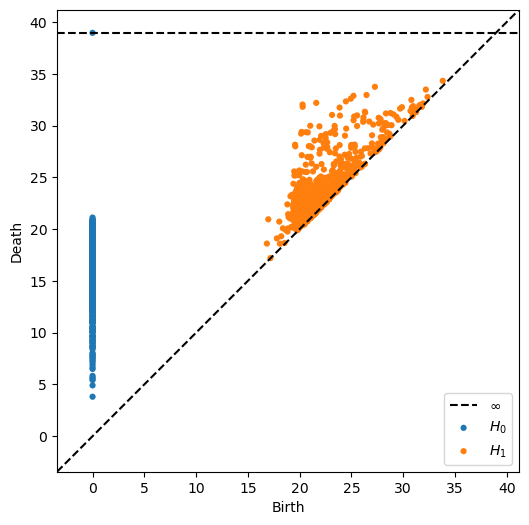

In [21]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [22]:
persistent_H1_intervals(output)

{(20.28053855895996, 32.03327560424805): 11.752737045288086,
 (20.29620933532715, 31.811588287353516): 11.515378952026367,
 (21.60691261291504, 32.19436264038086): 10.58745002746582,
 (20.199188232421875, 29.388832092285156): 9.189643859863281,
 (20.143735885620117, 29.225040435791016): 9.081304550170898}

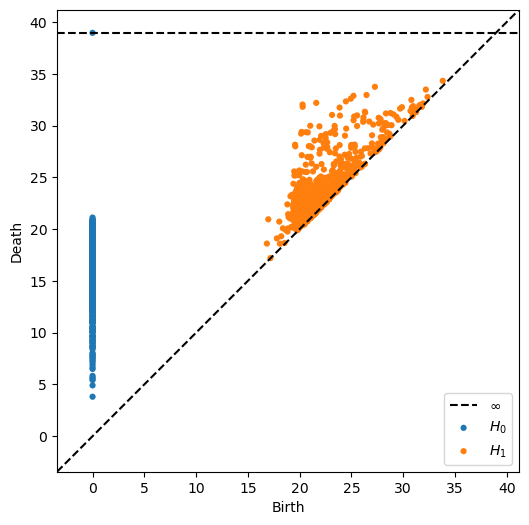

In [23]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [24]:
persistent_H1_intervals(output)

{(20.28053855895996, 32.03327560424805): 11.752737045288086,
 (20.29620933532715, 31.811588287353516): 11.515378952026367,
 (21.60691261291504, 32.19436264038086): 10.58745002746582,
 (20.199188232421875, 29.388832092285156): 9.189643859863281,
 (20.143735885620117, 29.225040435791016): 9.081304550170898}

In [25]:
M = view_matrix_penalize(image_function = slant, num_pixels = 30 , window_size = 3, a = 1, b = 1, scalar = 1.5, n_isos = 1000, x_translate= 10 , y_translate=10)
M

array([[ 0.        , 62.33411146, 30.76023779, ..., 52.37205709,
        43.69011176, 39.35401279],
       [62.33411146,  0.        , 57.37244211, ..., 48.5604137 ,
        54.23950424, 55.68884716],
       [30.76023779, 57.37244211,  0.        , ..., 55.49879379,
        51.97420259, 42.19893661],
       ...,
       [52.37205709, 48.5604137 , 55.49879379, ...,  0.        ,
        41.16244136, 49.18496384],
       [43.69011176, 54.23950424, 51.97420259, ..., 41.16244136,
         0.        , 44.18785846],
       [39.35401279, 55.68884716, 42.19893661, ..., 49.18496384,
        44.18785846,  0.        ]])

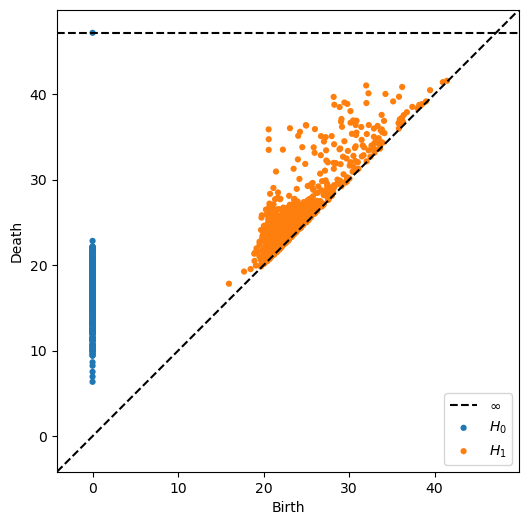

In [26]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [27]:
persistent_H1_intervals(output)

{(20.588092803955078, 35.87712097167969): 15.28902816772461,
 (20.598846435546875, 34.72311019897461): 14.124263763427734,
 (23.082046508789062, 36.010955810546875): 12.928909301757812,
 (20.59849739074707, 33.47853088378906): 12.880033493041992,
 (28.189083099365234, 39.67127227783203): 11.482189178466797}

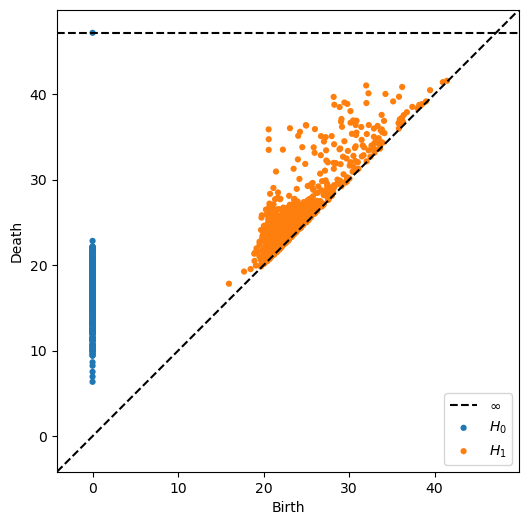

In [28]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [29]:
persistent_H1_intervals(output)

{(20.588092803955078, 35.87712097167969): 15.28902816772461,
 (20.598846435546875, 34.72311019897461): 14.124263763427734,
 (23.082046508789062, 36.010955810546875): 12.928909301757812,
 (20.59849739074707, 33.47853088378906): 12.880033493041992,
 (28.189083099365234, 39.67127227783203): 11.482189178466797}

### Next idea: 
take 1/4 of the isometries to be purely translations, then maybe try scaling the distances between two translations

In [4]:
def generate_isom_trans(n_isos, x_translate, y_translate, n_translates):
    a = list(2 * x_translate * np.random.random(n_isos+ n_translates) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos+n_translates) - y_translate) # sampling from (-y,y)
    theta = [0] * n_translates
    theta2 = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)
    for i in theta2:
        theta.append(i)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def matrix_of_distances(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append(new_colors(pixels, i, image_function))
    M = np.zeros((len(isos_inv), len(isos_inv)))
    for i in range(len(isos_inv)):
        for j in range(len(isos_inv)):
            M[i][j] = dist(vectors[i],vectors[j])
    return M

def view_matrix(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, n_translates):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom_trans(n_isos, x_translate, y_translate, n_translates)
    M = matrix_of_distances(pixels, isos_inv, image_function)
    return M

def mult_trans(M, n_translates, scalar):
    matrix = M.copy()
    for i in range(n_translates):
        for j in range(n_translates):
            matrix[i][j] = scalar * matrix[i][j]
    return matrix

In [31]:
M = view_matrix(image_function = slant, num_pixels = 40 , window_size = 3, n_isos = 2000, x_translate= 10 , y_translate=10, n_translates = 500)
M

array([[ 0.        , 27.07397274, 29.25747768, ..., 24.67792536,
        24.61706725, 22.24859546],
       [27.07397274,  0.        , 25.15949125, ..., 25.01999201,
        25.35744467, 24.97999199],
       [29.25747768, 25.15949125,  0.        , ..., 25.74878638,
        26.45751311, 23.85372088],
       ...,
       [24.67792536, 25.01999201, 25.74878638, ...,  0.        ,
        26.0959767 , 25.25866188],
       [24.61706725, 25.35744467, 26.45751311, ..., 26.0959767 ,
         0.        , 26.36285265],
       [22.24859546, 24.97999199, 23.85372088, ..., 25.25866188,
        26.36285265,  0.        ]])

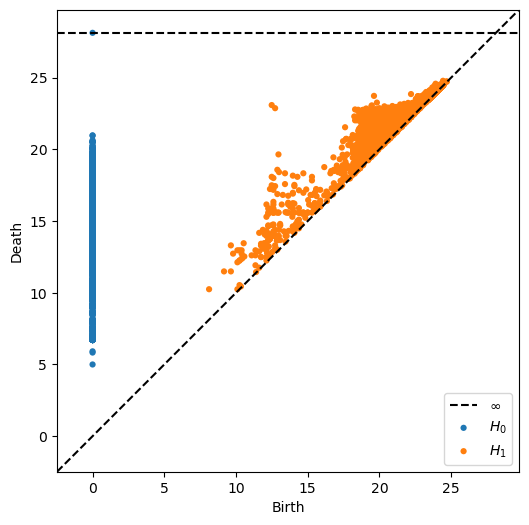

In [32]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [33]:
persistent_H1_intervals(output)

{(12.489995956420898, 23.0867919921875): 10.596796035766602,
 (12.727922439575195, 22.86919403076172): 10.141271591186523,
 (12.961481094360352, 19.646883010864258): 6.685401916503906,
 (12.884099006652832, 18.574174880981445): 5.690075874328613,
 (12.489995956420898, 18.083141326904297): 5.593145370483398}

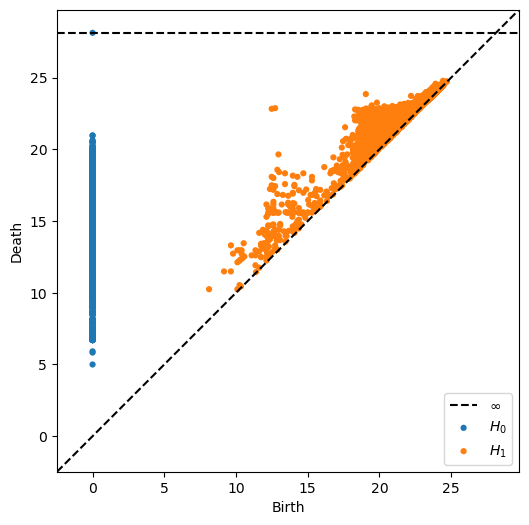

In [34]:
#notice the point that moves
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [35]:
persistent_H1_intervals(output)

{(12.489995956420898, 22.825424194335938): 10.335428237915039,
 (12.727922439575195, 22.86919403076172): 10.141271591186523,
 (12.961481094360352, 19.646883010864258): 6.685401916503906,
 (12.884099006652832, 18.574174880981445): 5.690075874328613,
 (12.489995956420898, 18.083141326904297): 5.593145370483398}

In [36]:
M2 = mult_trans(M, n_translates = 500, scalar=2)
M2

array([[ 0.        , 54.14794548, 58.51495535, ..., 24.67792536,
        24.61706725, 22.24859546],
       [54.14794548,  0.        , 50.3189825 , ..., 25.01999201,
        25.35744467, 24.97999199],
       [58.51495535, 50.3189825 ,  0.        , ..., 25.74878638,
        26.45751311, 23.85372088],
       ...,
       [24.67792536, 25.01999201, 25.74878638, ...,  0.        ,
        26.0959767 , 25.25866188],
       [24.61706725, 25.35744467, 26.45751311, ..., 26.0959767 ,
         0.        , 26.36285265],
       [22.24859546, 24.97999199, 23.85372088, ..., 25.25866188,
        26.36285265,  0.        ]])

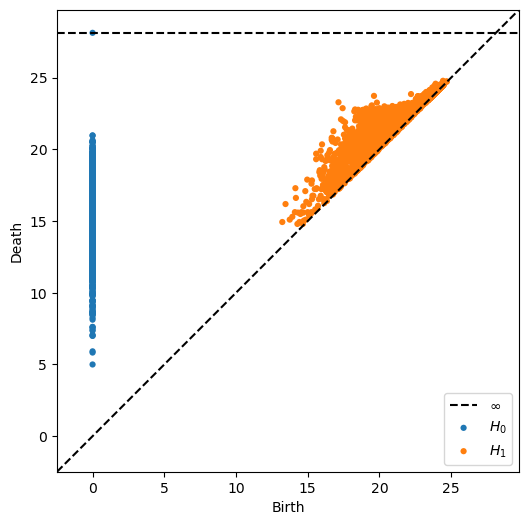

In [37]:
output = ripser(M2, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [38]:
persistent_H1_intervals(output)

{(17.14642906188965, 23.280893325805664): 6.134464263916016,
 (17.435596466064453, 22.86919403076172): 5.433597564697266,
 (17.32050895690918, 22.090721130371094): 4.770212173461914,
 (17.464248657226562, 21.97726058959961): 4.513011932373047,
 (18.30300521850586, 22.781572341918945): 4.478567123413086}

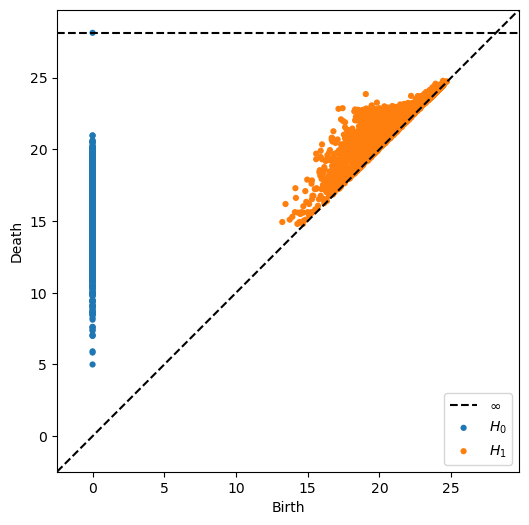

In [39]:
output = ripser(M2, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [40]:
persistent_H1_intervals(output)

{(17.14642906188965, 22.825424194335938): 5.678995132446289,
 (17.435596466064453, 22.86919403076172): 5.433597564697266,
 (19.05255889892578, 23.853721618652344): 4.8011627197265625,
 (17.32050895690918, 22.090721130371094): 4.770212173461914,
 (17.464248657226562, 21.97726058959961): 4.513011932373047}

In [41]:
M3 = mult_trans(M, n_translates = 500, scalar=10)
M3

array([[  0.        , 270.73972741, 292.57477677, ...,  24.67792536,
         24.61706725,  22.24859546],
       [270.73972741,   0.        , 251.59491251, ...,  25.01999201,
         25.35744467,  24.97999199],
       [292.57477677, 251.59491251,   0.        , ...,  25.74878638,
         26.45751311,  23.85372088],
       ...,
       [ 24.67792536,  25.01999201,  25.74878638, ...,   0.        ,
         26.0959767 ,  25.25866188],
       [ 24.61706725,  25.35744467,  26.45751311, ...,  26.0959767 ,
          0.        ,  26.36285265],
       [ 22.24859546,  24.97999199,  23.85372088, ...,  25.25866188,
         26.36285265,   0.        ]])

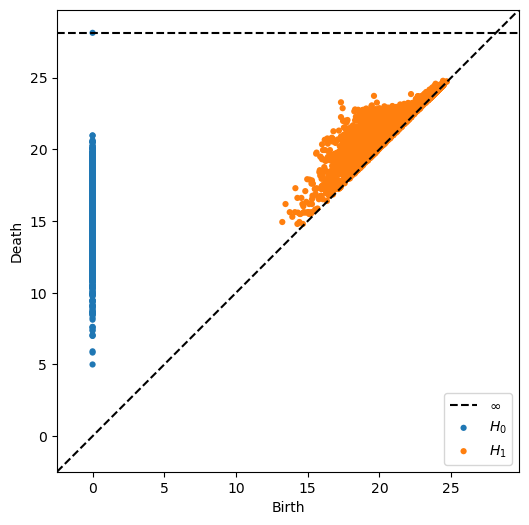

In [42]:
output = ripser(M3, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [43]:
persistent_H1_intervals(output)

{(17.32050895690918, 23.280893325805664): 5.960384368896484,
 (17.435596466064453, 22.86919403076172): 5.433597564697266,
 (17.32050895690918, 22.24859619140625): 4.92808723449707,
 (17.464248657226562, 21.97726058959961): 4.513011932373047,
 (18.30300521850586, 22.781572341918945): 4.478567123413086}

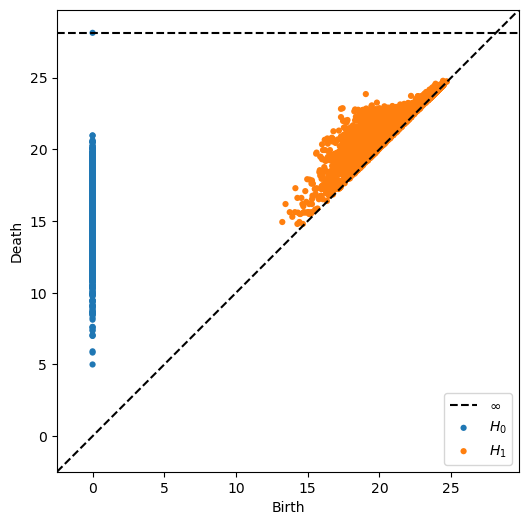

In [44]:
output = ripser(M3, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [45]:
persistent_H1_intervals(output)

{(17.32050895690918, 22.825424194335938): 5.504915237426758,
 (17.435596466064453, 22.86919403076172): 5.433597564697266,
 (17.32050895690918, 22.24859619140625): 4.92808723449707,
 (19.05255889892578, 23.853721618652344): 4.8011627197265625,
 (17.464248657226562, 21.97726058959961): 4.513011932373047}

In [46]:
M4 = mult_trans(M, n_translates = 500, scalar=20)
M4

array([[  0.        , 541.47945483, 585.14955353, ...,  24.67792536,
         24.61706725,  22.24859546],
       [541.47945483,   0.        , 503.18982502, ...,  25.01999201,
         25.35744467,  24.97999199],
       [585.14955353, 503.18982502,   0.        , ...,  25.74878638,
         26.45751311,  23.85372088],
       ...,
       [ 24.67792536,  25.01999201,  25.74878638, ...,   0.        ,
         26.0959767 ,  25.25866188],
       [ 24.61706725,  25.35744467,  26.45751311, ...,  26.0959767 ,
          0.        ,  26.36285265],
       [ 22.24859546,  24.97999199,  23.85372088, ...,  25.25866188,
         26.36285265,   0.        ]])

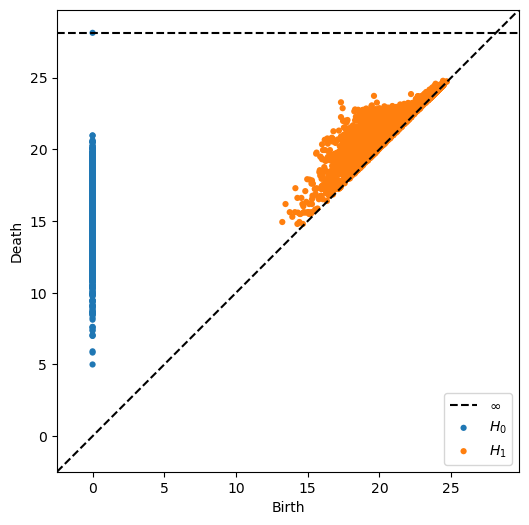

In [47]:
output = ripser(M4, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [48]:
persistent_H1_intervals(output)

{(17.32050895690918, 23.280893325805664): 5.960384368896484,
 (17.435596466064453, 22.86919403076172): 5.433597564697266,
 (17.32050895690918, 22.24859619140625): 4.92808723449707,
 (17.464248657226562, 21.97726058959961): 4.513011932373047,
 (18.30300521850586, 22.781572341918945): 4.478567123413086}

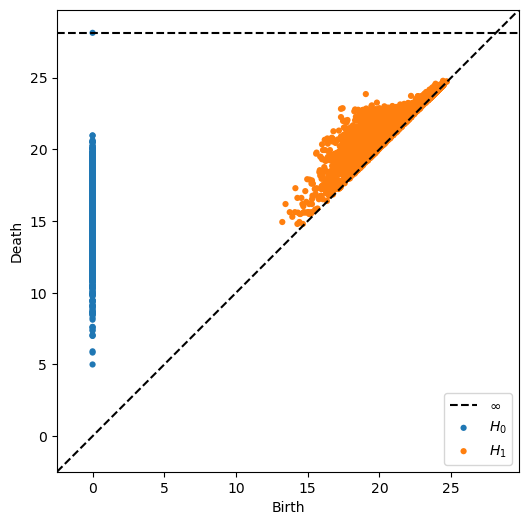

In [49]:
output = ripser(M4, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [50]:
persistent_H1_intervals(output)

{(17.32050895690918, 22.825424194335938): 5.504915237426758,
 (17.435596466064453, 22.86919403076172): 5.433597564697266,
 (17.32050895690918, 22.24859619140625): 4.92808723449707,
 (19.05255889892578, 23.853721618652344): 4.8011627197265625,
 (17.464248657226562, 21.97726058959961): 4.513011932373047}

# C3

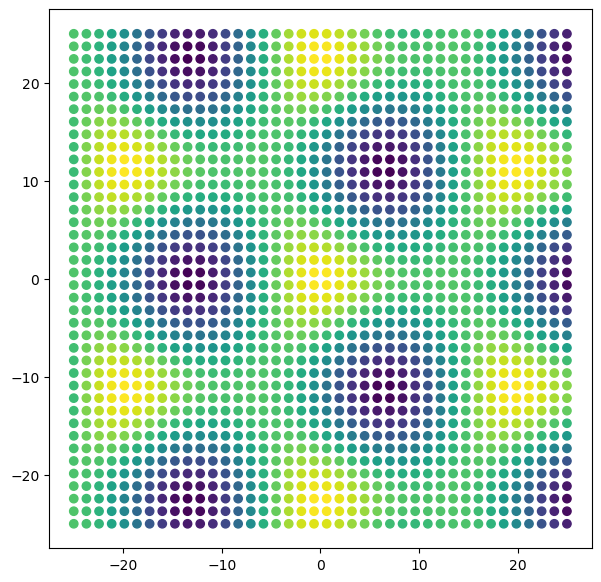

In [6]:
def p3(x,y):
    X = 1/(2 * pi) * (x + y / (3**(1/2)))
    Y = 1/(2 * pi) * 2 * y / (3**(1/2))
    C = cos(X + Y) + cos(X - 2 * Y) + cos(-2 * X + Y)
    S = sin(X + Y) +sin(X - 2*Y) +sin(-2 * X + Y)
    return C + S

view_window_continuous(image_function = p3, num_pixels= 40, window_size=50)

In [52]:
M = view_matrix_penalize(image_function = p3, num_pixels = 40 , window_size = 50, a = 40, b = 45, scalar = 1, n_isos = 1000, x_translate= 90 , y_translate=90)
M

array([[  0.        , 160.11605454, 166.52568061, ..., 189.17329393,
        211.99104099, 196.21496865],
       [160.11605454,   0.        , 214.2033287 , ..., 210.89041438,
        241.07704519, 131.95370503],
       [166.52568061, 214.2033287 ,   0.        , ..., 186.70092622,
        185.33053771, 229.30029556],
       ...,
       [189.17329393, 210.89041438, 186.70092622, ...,   0.        ,
        197.74943234, 249.54193558],
       [211.99104099, 241.07704519, 185.33053771, ..., 197.74943234,
          0.        , 150.94655128],
       [196.21496865, 131.95370503, 229.30029556, ..., 249.54193558,
        150.94655128,   0.        ]])

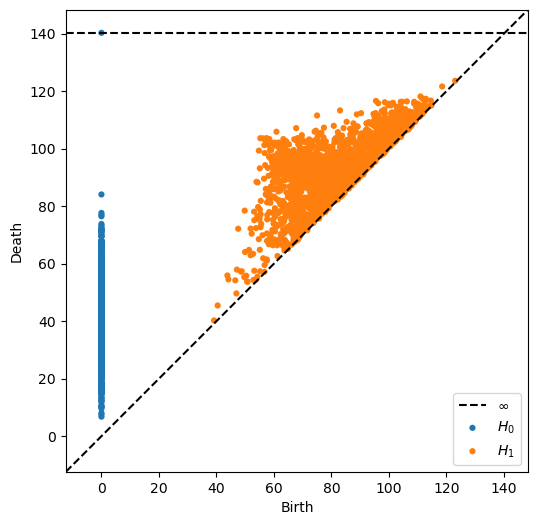

In [53]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [54]:
persistent_H1_intervals(output)

{(55.266929626464844, 103.6461410522461): 48.37921142578125,
 (56.146766662597656, 103.60610961914062): 47.45934295654297,
 (57.44805145263672, 103.69283294677734): 46.244781494140625,
 (57.037864685058594, 103.12550354003906): 46.08763885498047,
 (57.42643737792969, 103.37348937988281): 45.947052001953125}

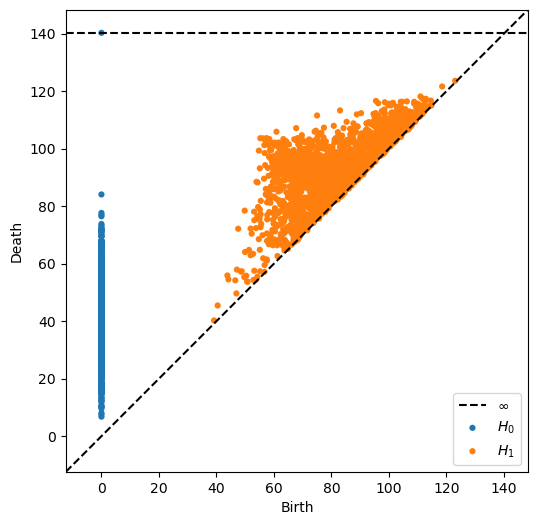

In [55]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [56]:
persistent_H1_intervals(output)

{(55.266929626464844, 103.6461410522461): 48.37921142578125,
 (56.146766662597656, 103.60610961914062): 47.45934295654297,
 (57.44805145263672, 103.69283294677734): 46.244781494140625,
 (57.037864685058594, 103.12550354003906): 46.08763885498047,
 (57.42643737792969, 103.37348937988281): 45.947052001953125}

In [57]:
M = view_matrix_penalize(image_function = p3, num_pixels = 40 , window_size = 50, a = 40, b = 45, scalar = 0, n_isos = 1000, x_translate= 90 , y_translate=90)
M

array([[  0.        ,  92.61782002, 108.37884172, ..., 108.4403343 ,
        108.68252809, 100.37950859],
       [ 92.61782002,   0.        ,  96.68853472, ...,  90.25918345,
        103.69999197, 100.37891041],
       [108.37884172,  96.68853472,   0.        , ...,  48.61837458,
        112.2082615 ,  65.52876861],
       ...,
       [108.4403343 ,  90.25918345,  48.61837458, ...,   0.        ,
        108.8571166 ,  86.64905421],
       [108.68252809, 103.69999197, 112.2082615 , ..., 108.8571166 ,
          0.        ,  94.53561919],
       [100.37950859, 100.37891041,  65.52876861, ...,  86.64905421,
         94.53561919,   0.        ]])

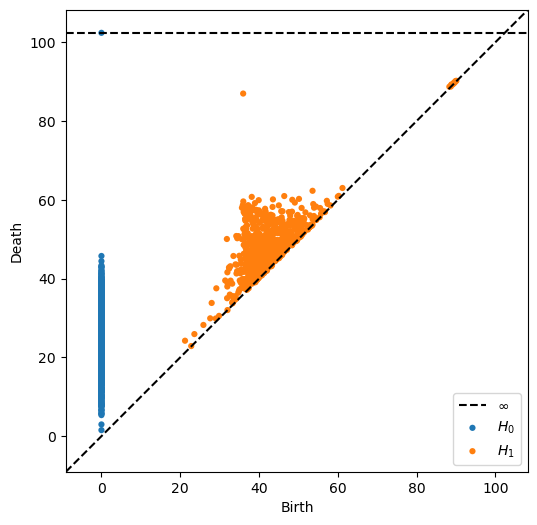

In [58]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [59]:
persistent_H1_intervals(output)

{(35.98252868652344, 86.9950942993164): 51.01256561279297,
 (36.01698684692383, 59.60194396972656): 23.584957122802734,
 (35.90383529663086, 58.640533447265625): 22.736698150634766,
 (35.942474365234375, 58.61509704589844): 22.672622680664062,
 (38.159202575683594, 60.75946044921875): 22.600257873535156}

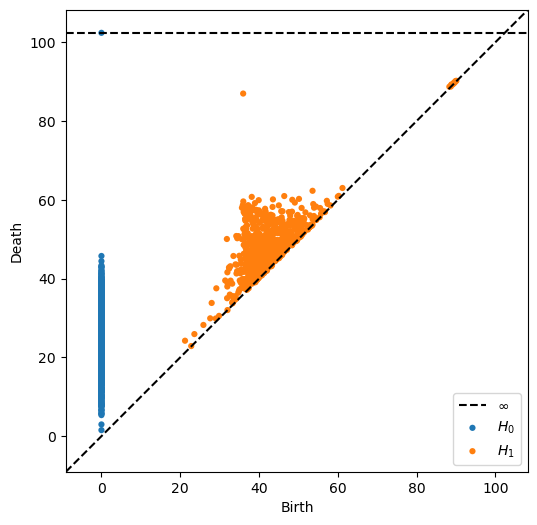

In [60]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [61]:
persistent_H1_intervals(output)

{(35.98252868652344, 86.9950942993164): 51.01256561279297,
 (36.01698684692383, 59.60194396972656): 23.584957122802734,
 (35.90383529663086, 58.640533447265625): 22.736698150634766,
 (35.942474365234375, 58.61509704589844): 22.672622680664062,
 (38.159202575683594, 60.75946044921875): 22.600257873535156}

In [62]:
M = view_matrix_penalize(image_function = p3, num_pixels = 40 , window_size = 50, a = 40, b = 45, scalar = -1, n_isos = 1000, x_translate= 90 , y_translate=90)
M

array([[  0.        , -24.70762758,  25.34048284, ...,  44.31919431,
         -0.137457  , -29.83409015],
       [-24.70762758,   0.        , -22.7309394 , ..., -40.21065474,
        -23.12642632,   1.70130905],
       [ 25.34048284, -22.7309394 ,   0.        , ...,  59.23190323,
          9.35888072,  -9.47729418],
       ...,
       [ 44.31919431, -40.21065474,  59.23190323, ...,   0.        ,
          5.711635  , -18.24390638],
       [ -0.137457  , -23.12642632,   9.35888072, ...,   5.711635  ,
          0.        ,   4.68916761],
       [-29.83409015,   1.70130905,  -9.47729418, ..., -18.24390638,
          4.68916761,   0.        ]])

In [ ]:
#this wont run 
'''
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)
'''

In [50]:
M = view_matrix_penalize(image_function = p3, num_pixels = 40 , window_size = 50, a = 40, b = 45, scalar = -0.5, n_isos = 1000, x_translate= 90 , y_translate=90)
M

array([[ 0.        , 65.52157778, 55.66535178, ..., 39.09467287,
        59.14315356, 36.17568602],
       [65.52157778,  0.        , 55.15985931, ..., 57.96378206,
        62.9556754 , 37.47814609],
       [55.66535178, 55.15985931,  0.        , ..., 64.18397604,
        76.95573869, 67.82578776],
       ...,
       [39.09467287, 57.96378206, 64.18397604, ...,  0.        ,
        73.25183175, 59.19916642],
       [59.14315356, 62.9556754 , 76.95573869, ..., 73.25183175,
         0.        , 54.04413451],
       [36.17568602, 37.47814609, 67.82578776, ..., 59.19916642,
        54.04413451,  0.        ]])

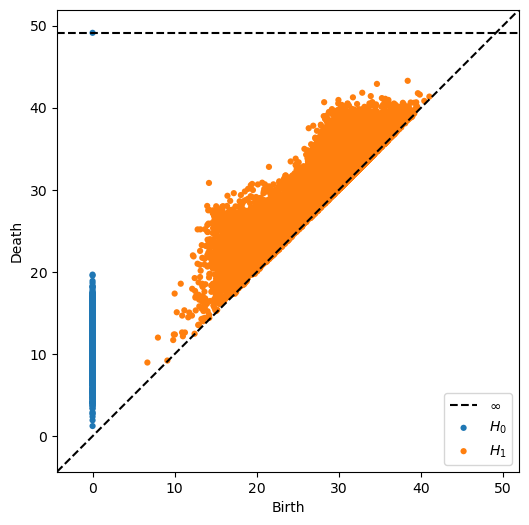

In [51]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [52]:
persistent_H1_intervals(output)

{(14.175638198852539, 30.840957641601562): 16.665319442749023,
 (13.961908340454102, 28.03887939453125): 14.076971054077148,
 (14.083182334899902, 27.50600242614746): 13.422820091247559,
 (14.18846607208252, 27.573244094848633): 13.384778022766113,
 (15.055607795715332, 28.00140380859375): 12.945796012878418}

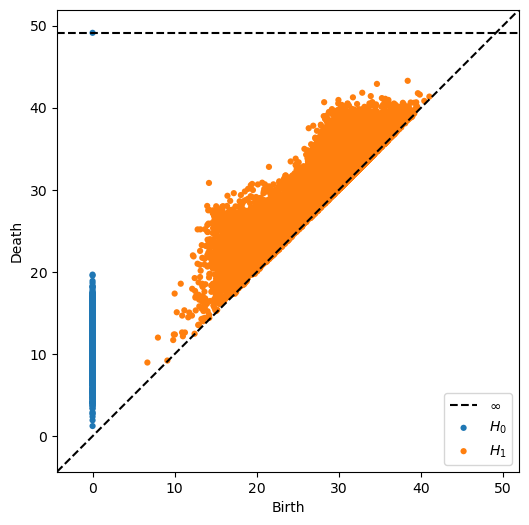

In [53]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [54]:
persistent_H1_intervals(output)

{(14.175638198852539, 30.840957641601562): 16.665319442749023,
 (13.961908340454102, 28.03887939453125): 14.076971054077148,
 (14.083182334899902, 27.50600242614746): 13.422820091247559,
 (14.18846607208252, 27.573244094848633): 13.384778022766113,
 (15.055607795715332, 28.00140380859375): 12.945796012878418}

In [45]:
M = view_matrix_penalize(image_function = p3, num_pixels = 40 , window_size = 50, a = 40, b = 45, scalar = -0.25, n_isos = 1000, x_translate= 90 , y_translate=90)
M

array([[ 0.        , 41.92375572, 82.41145919, ..., 56.67141616,
        57.08732756, 79.78309018],
       [41.92375572,  0.        , 66.25925996, ..., 59.28966024,
        47.08398858, 67.8748135 ],
       [82.41145919, 66.25925996,  0.        , ..., 83.37009877,
        68.49253891, 94.79162563],
       ...,
       [56.67141616, 59.28966024, 83.37009877, ...,  0.        ,
        71.02891709, 62.16217213],
       [57.08732756, 47.08398858, 68.49253891, ..., 71.02891709,
         0.        , 71.87348966],
       [79.78309018, 67.8748135 , 94.79162563, ..., 62.16217213,
        71.87348966,  0.        ]])

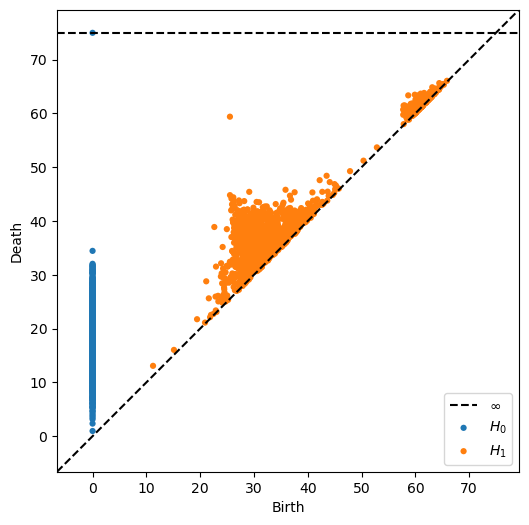

In [46]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [47]:
persistent_H1_intervals(output)

{(25.528175354003906, 59.375274658203125): 33.84709930419922,
 (25.540225982666016, 44.79511642456055): 19.25489044189453,
 (25.808504104614258, 44.159202575683594): 18.350698471069336,
 (26.156904220581055, 44.391700744628906): 18.23479652404785,
 (25.990055084228516, 44.14781188964844): 18.157756805419922}

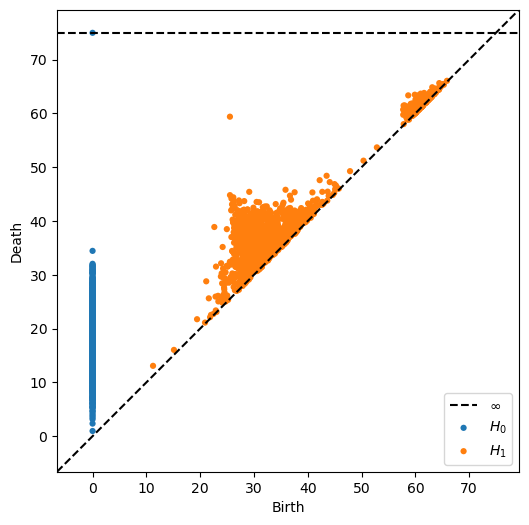

In [48]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [49]:
persistent_H1_intervals(output)

{(25.528175354003906, 59.375274658203125): 33.84709930419922,
 (25.540225982666016, 44.79511642456055): 19.25489044189453,
 (25.808504104614258, 44.159202575683594): 18.350698471069336,
 (26.156904220581055, 44.391700744628906): 18.23479652404785,
 (25.990055084228516, 44.14781188964844): 18.157756805419922}

In [55]:
M = view_matrix(image_function = p3, num_pixels = 40 , window_size = 50, n_isos = 2000, x_translate= 100 , y_translate=100, n_translates = 500)
M

array([[  0.        , 111.1282133 , 100.55407193, ...,  96.98374328,
         96.92292644,  51.29275015],
       [111.1282133 ,   0.        ,  97.79265221, ..., 104.5607468 ,
         98.7965894 ,  95.62690176],
       [100.55407193,  97.79265221,   0.        , ...,  98.52429219,
         99.77810416, 108.09258743],
       ...,
       [ 96.98374328, 104.5607468 ,  98.52429219, ...,   0.        ,
        109.59685667, 102.72177997],
       [ 96.92292644,  98.7965894 ,  99.77810416, ..., 109.59685667,
          0.        , 103.87974234],
       [ 51.29275015,  95.62690176, 108.09258743, ..., 102.72177997,
        103.87974234,   0.        ]])

In [56]:
total = 0 
for i in range(len(M)):
    for j in range(len(M)):
        total += M[i][j]
ave = total / (len(M)*len(M))
ave

96.94441683365923

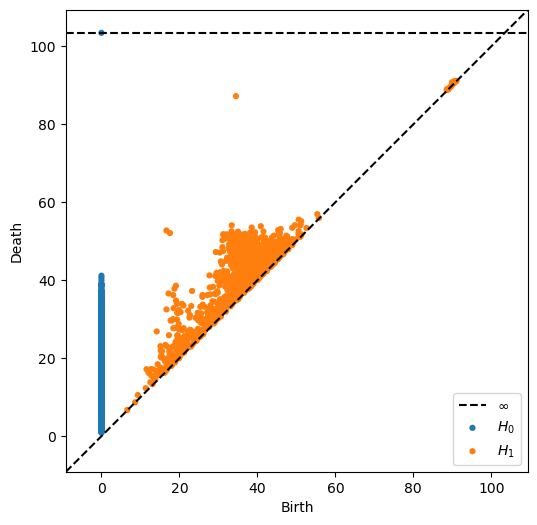

In [57]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [58]:
p1 = persistent_H1_intervals(output)
p1

{(34.49988555908203, 87.21736145019531): 52.71747589111328,
 (16.673208236694336, 52.758460998535156): 36.08525276184082,
 (17.588075637817383, 52.092628479003906): 34.50455284118652,
 (33.40972137451172, 54.093482971191406): 20.683761596679688,
 (31.22931671142578, 51.80885696411133): 20.579540252685547}

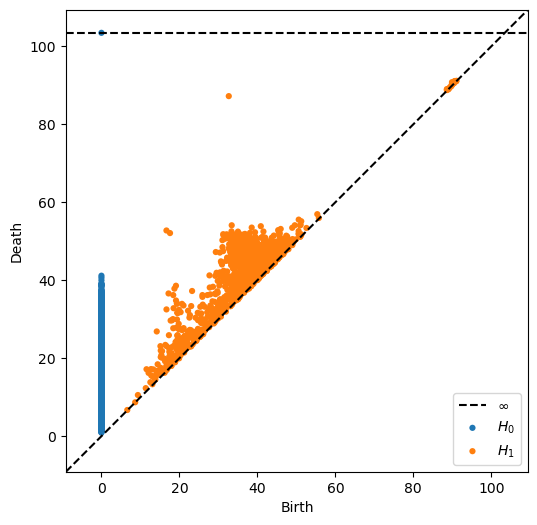

In [59]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [60]:
p2 = persistent_H1_intervals(output)
p2 

{(32.65848922729492, 87.21736145019531): 54.55887222290039,
 (16.673208236694336, 52.758460998535156): 36.08525276184082,
 (17.588075637817383, 52.092628479003906): 34.50455284118652,
 (33.40972137451172, 54.093482971191406): 20.683761596679688,
 (31.22931671142578, 51.80885696411133): 20.579540252685547}

In [61]:
M2 = mult_trans(M, n_translates = 500, scalar=2)
M2

array([[  0.        , 222.25642661, 201.10814386, ...,  96.98374328,
         96.92292644,  51.29275015],
       [222.25642661,   0.        , 195.58530441, ..., 104.5607468 ,
         98.7965894 ,  95.62690176],
       [201.10814386, 195.58530441,   0.        , ...,  98.52429219,
         99.77810416, 108.09258743],
       ...,
       [ 96.98374328, 104.5607468 ,  98.52429219, ...,   0.        ,
        109.59685667, 102.72177997],
       [ 96.92292644,  98.7965894 ,  99.77810416, ..., 109.59685667,
          0.        , 103.87974234],
       [ 51.29275015,  95.62690176, 108.09258743, ..., 102.72177997,
        103.87974234,   0.        ]])

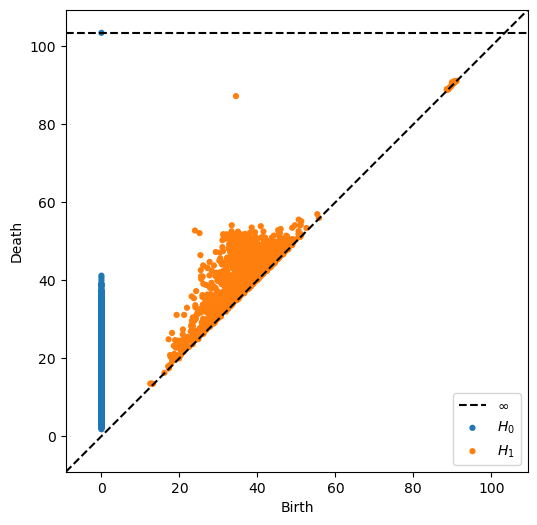

In [62]:
output = ripser(M2, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [63]:
persistent_H1_intervals(output)

{(34.49988555908203, 87.21736145019531): 52.71747589111328,
 (23.9854679107666, 52.758460998535156): 28.772993087768555,
 (25.16522789001465, 52.092628479003906): 26.927400588989258,
 (25.384923934936523, 46.43013000488281): 21.04520606994629,
 (33.40972137451172, 54.093482971191406): 20.683761596679688}

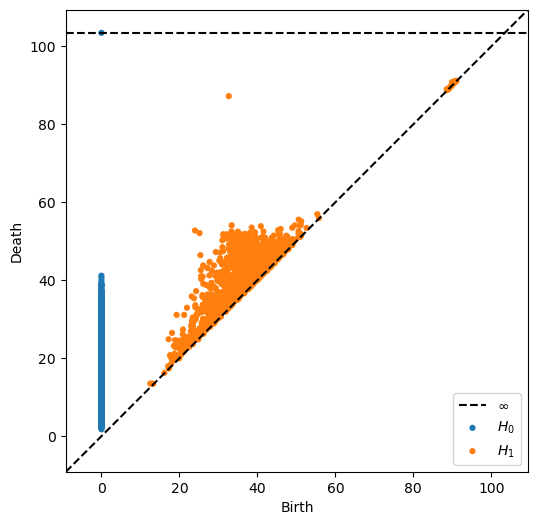

In [64]:
output = ripser(M2, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [65]:
persistent_H1_intervals(output)

{(32.65848922729492, 87.21736145019531): 54.55887222290039,
 (23.9854679107666, 52.758460998535156): 28.772993087768555,
 (25.16522789001465, 52.092628479003906): 26.927400588989258,
 (25.384923934936523, 46.43013000488281): 21.04520606994629,
 (33.40972137451172, 54.093482971191406): 20.683761596679688}

In [66]:
M4 = mult_trans(M, n_translates = 500, scalar=.5)
M4

array([[  0.        ,  55.56410665,  50.27703597, ...,  96.98374328,
         96.92292644,  51.29275015],
       [ 55.56410665,   0.        ,  48.8963261 , ..., 104.5607468 ,
         98.7965894 ,  95.62690176],
       [ 50.27703597,  48.8963261 ,   0.        , ...,  98.52429219,
         99.77810416, 108.09258743],
       ...,
       [ 96.98374328, 104.5607468 ,  98.52429219, ...,   0.        ,
        109.59685667, 102.72177997],
       [ 96.92292644,  98.7965894 ,  99.77810416, ..., 109.59685667,
          0.        , 103.87974234],
       [ 51.29275015,  95.62690176, 108.09258743, ..., 102.72177997,
        103.87974234,   0.        ]])

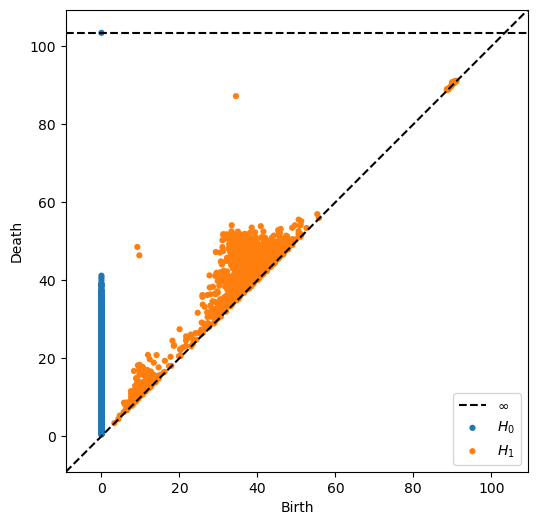

In [67]:
output = ripser(M4, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [68]:
persistent_H1_intervals(output)

{(34.49988555908203, 87.21736145019531): 52.71747589111328,
 (9.207393646240234, 48.53322219848633): 39.325828552246094,
 (9.722542762756348, 46.37541580200195): 36.652873039245605,
 (33.40972137451172, 54.093482971191406): 20.683761596679688,
 (31.22931671142578, 51.80885696411133): 20.579540252685547}

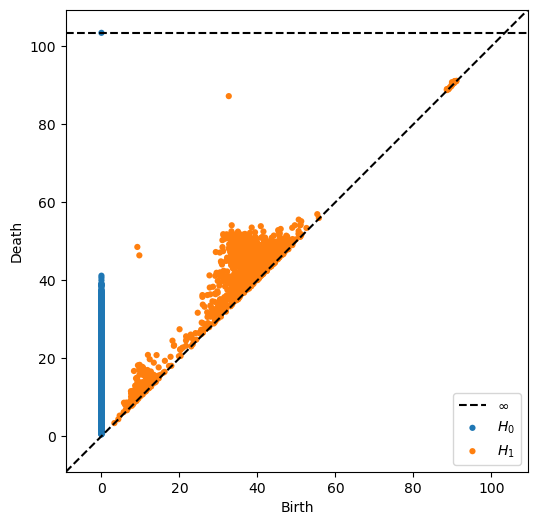

In [69]:
output = ripser(M4, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [70]:
persistent_H1_intervals(output)

{(32.65848922729492, 87.21736145019531): 54.55887222290039,
 (9.207393646240234, 48.53322219848633): 39.325828552246094,
 (9.722542762756348, 46.37541580200195): 36.652873039245605,
 (33.40972137451172, 54.093482971191406): 20.683761596679688,
 (31.22931671142578, 51.80885696411133): 20.579540252685547}

In [71]:
M = view_matrix(image_function = p3, num_pixels = 40 , window_size = 50, n_isos = 2000, x_translate= 100 , y_translate=100, n_translates = 1000)
M

array([[  0.        ,  97.61074261,  99.85696822, ..., 104.93544423,
        101.44857522, 112.57104856],
       [ 97.61074261,   0.        , 120.86687856, ...,  89.21510024,
        100.25868975, 102.95162481],
       [ 99.85696822, 120.86687856,   0.        , ..., 101.46031108,
         90.2682646 ,  84.17708047],
       ...,
       [104.93544423,  89.21510024, 101.46031108, ...,   0.        ,
         95.67068826,  82.46410038],
       [101.44857522, 100.25868975,  90.2682646 , ...,  95.67068826,
          0.        ,  99.47168806],
       [112.57104856, 102.95162481,  84.17708047, ...,  82.46410038,
         99.47168806,   0.        ]])

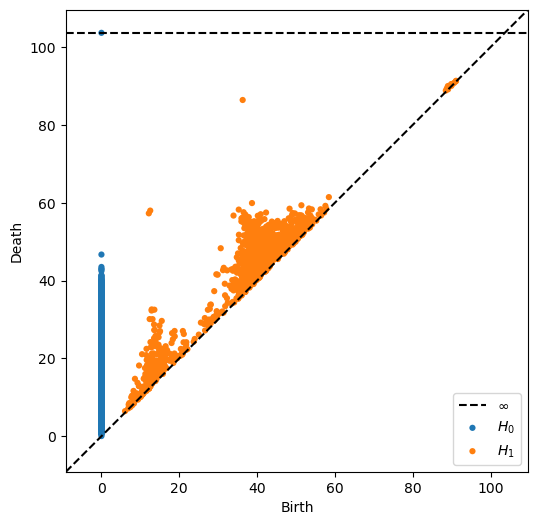

In [72]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [73]:
persistent_H1_intervals(output)

{(36.298301696777344, 86.40575408935547): 50.107452392578125,
 (12.542494773864746, 57.982154846191406): 45.43966007232666,
 (12.175445556640625, 57.27105712890625): 45.095611572265625,
 (35.28730392456055, 58.236785888671875): 22.949481964111328,
 (33.94715881347656, 56.70028305053711): 22.753124237060547}

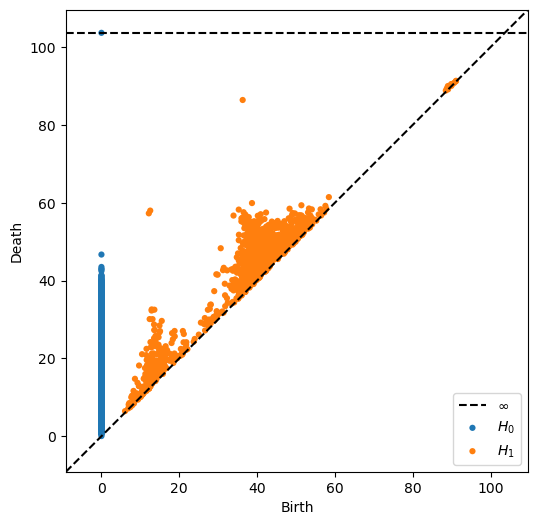

In [74]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [75]:
persistent_H1_intervals(output)

{(36.298301696777344, 86.40575408935547): 50.107452392578125,
 (12.542494773864746, 57.982154846191406): 45.43966007232666,
 (12.175445556640625, 57.27105712890625): 45.095611572265625,
 (35.28730392456055, 58.236785888671875): 22.949481964111328,
 (33.94715881347656, 56.70028305053711): 22.753124237060547}

In [76]:
M2 = mult_trans(M, n_translates = 1000, scalar=.5)
M2

array([[  0.        ,  48.8053713 ,  49.92848411, ..., 104.93544423,
        101.44857522, 112.57104856],
       [ 48.8053713 ,   0.        ,  60.43343928, ...,  89.21510024,
        100.25868975, 102.95162481],
       [ 49.92848411,  60.43343928,   0.        , ..., 101.46031108,
         90.2682646 ,  84.17708047],
       ...,
       [104.93544423,  89.21510024, 101.46031108, ...,   0.        ,
         95.67068826,  82.46410038],
       [101.44857522, 100.25868975,  90.2682646 , ...,  95.67068826,
          0.        ,  99.47168806],
       [112.57104856, 102.95162481,  84.17708047, ...,  82.46410038,
         99.47168806,   0.        ]])

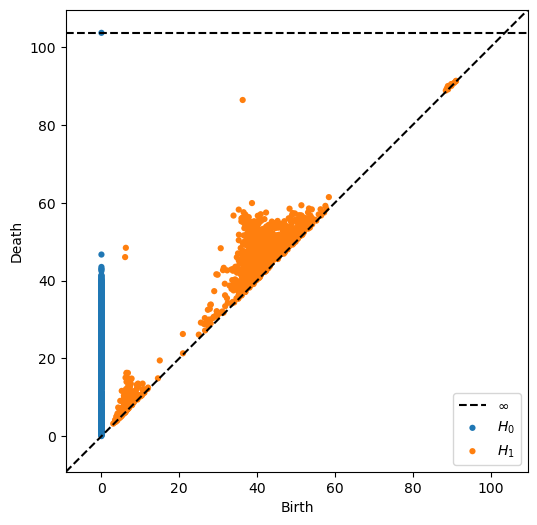

In [77]:
output = ripser(M2, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [78]:
persistent_H1_intervals(output)

{(36.298301696777344, 86.40575408935547): 50.107452392578125,
 (6.271247386932373, 48.41702651977539): 42.14577913284302,
 (6.0877227783203125, 46.02476119995117): 39.93703842163086,
 (35.28730392456055, 58.236785888671875): 22.949481964111328,
 (33.94715881347656, 56.70028305053711): 22.753124237060547}

## C2

In [79]:
def sincos(x,y):
    return sin(2 * x + y) * cos(y)

In [81]:
M = view_matrix(image_function = sincos, num_pixels = 40 , window_size = 5, n_isos = 2000, x_translate= 100 , y_translate=100, n_translates = 500)
M

array([[ 0.        , 27.3691338 , 26.29275318, ..., 24.11352494,
        26.19251429, 24.52141614],
       [27.3691338 ,  0.        , 31.95568529, ..., 31.06325955,
        27.41672585, 27.87348638],
       [26.29275318, 31.95568529,  0.        , ..., 26.35130125,
        25.61893616, 20.1320996 ],
       ...,
       [24.11352494, 31.06325955, 26.35130125, ...,  0.        ,
        28.36178947, 27.24682343],
       [26.19251429, 27.41672585, 25.61893616, ..., 28.36178947,
         0.        , 26.36972872],
       [24.52141614, 27.87348638, 20.1320996 , ..., 27.24682343,
        26.36972872,  0.        ]])

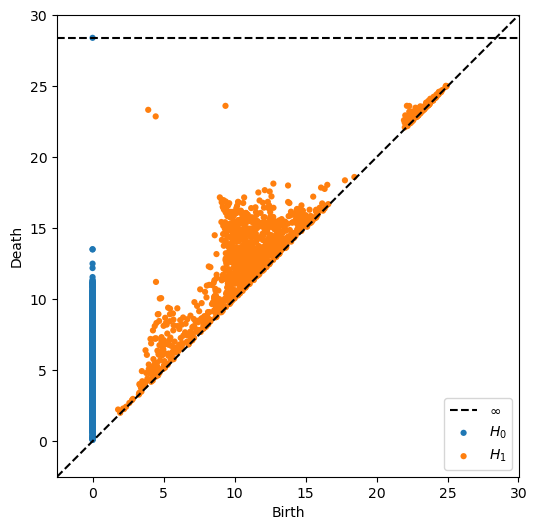

In [82]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [83]:
persistent_H1_intervals(output)

{(3.920469284057617, 23.33844566345215): 19.41797637939453,
 (4.446223258972168, 22.876190185546875): 18.429966926574707,
 (9.362287521362305, 23.619216918945312): 14.256929397583008,
 (8.963871955871582, 17.172473907470703): 8.208601951599121,
 (9.08813762664795, 17.01658821105957): 7.928450584411621}

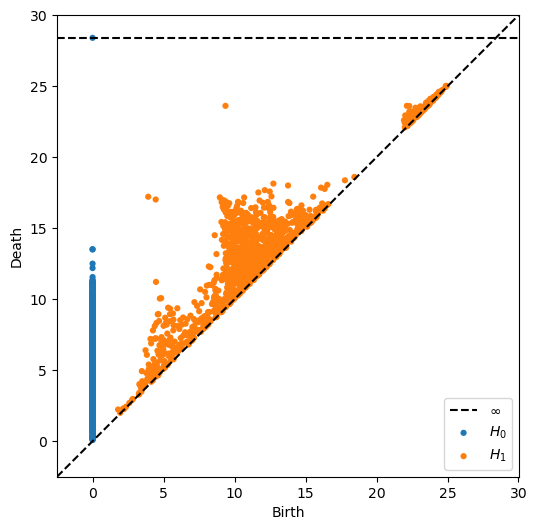

In [84]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [85]:
persistent_H1_intervals(output)

{(9.362287521362305, 23.619216918945312): 14.256929397583008,
 (3.920469284057617, 17.217967987060547): 13.29749870300293,
 (4.446223258972168, 17.023094177246094): 12.576870918273926,
 (8.963871955871582, 17.172473907470703): 8.208601951599121,
 (9.08813762664795, 17.01658821105957): 7.928450584411621}

# C4

In [86]:
def checker(x,y): 
    if 0 <= x%2 < 1 and 0 <= y%2 < 1:
        res = 1 
    elif 1 <= x%2 < 2 and 1 <= y%2 < 2:
        res = 1
    else: 
        res = 0
    return res

In [87]:
M = view_matrix(image_function = checker, num_pixels = 40 , window_size = 2, n_isos = 2000, x_translate= 1000 , y_translate=100, n_translates = 500)
M

array([[ 0.        , 31.74901573, 33.1662479 , ..., 16.82260384,
        26.64582519, 29.96664813],
       [31.74901573,  0.        , 28.8444102 , ..., 30.38091506,
        28.31960452, 28.70540019],
       [33.1662479 , 28.8444102 ,  0.        , ..., 34.9714169 ,
        30.13303835, 18.97366596],
       ...,
       [16.82260384, 30.38091506, 34.9714169 , ...,  0.        ,
        26.2488095 , 31.98437118],
       [26.64582519, 28.31960452, 30.13303835, ..., 26.2488095 ,
         0.        , 26.83281573],
       [29.96664813, 28.70540019, 18.97366596, ..., 31.98437118,
        26.83281573,  0.        ]])

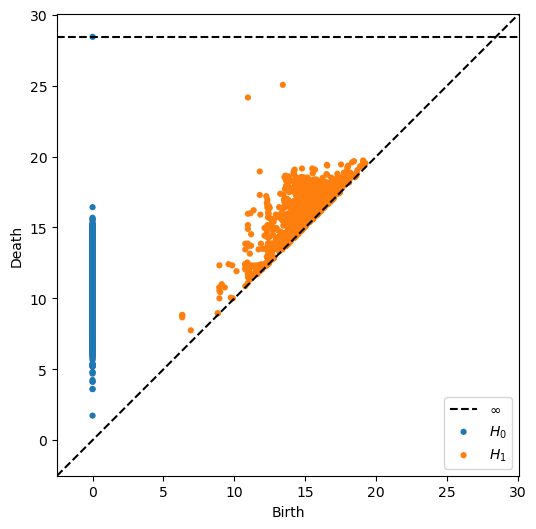

In [88]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [89]:
persistent_H1_intervals(output)

{(10.954451560974121, 24.166091918945312): 13.211640357971191,
 (13.416407585144043, 25.05992889404297): 11.643521308898926,
 (11.789826393127441, 18.947296142578125): 7.157469749450684,
 (11.789826393127441, 17.291616439819336): 5.5017900466918945,
 (13.601470947265625, 18.65475845336914): 5.053287506103516}

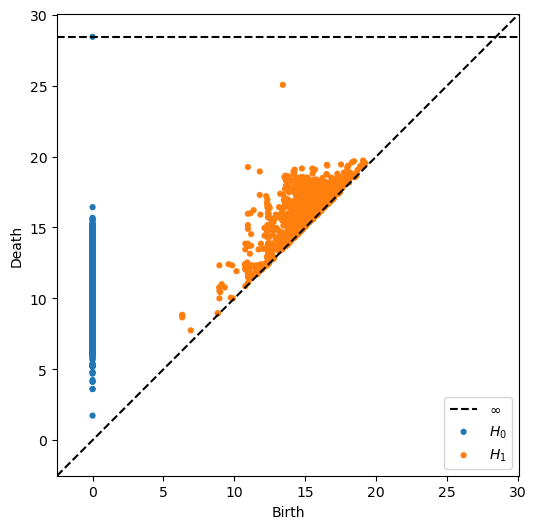

In [90]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [91]:
persistent_H1_intervals(output)

{(13.416407585144043, 25.05992889404297): 11.643521308898926,
 (10.954451560974121, 19.26136016845703): 8.30690860748291,
 (11.789826393127441, 18.947296142578125): 7.157469749450684,
 (11.789826393127441, 17.291616439819336): 5.5017900466918945,
 (13.601470947265625, 18.65475845336914): 5.053287506103516}

In [92]:
M2 = mult_trans(M, n_translates = 500, scalar=1.5)
M2

array([[ 0.        , 47.6235236 , 49.74937186, ..., 16.82260384,
        26.64582519, 29.96664813],
       [47.6235236 ,  0.        , 43.26661531, ..., 30.38091506,
        28.31960452, 28.70540019],
       [49.74937186, 43.26661531,  0.        , ..., 34.9714169 ,
        30.13303835, 18.97366596],
       ...,
       [16.82260384, 30.38091506, 34.9714169 , ...,  0.        ,
        26.2488095 , 31.98437118],
       [26.64582519, 28.31960452, 30.13303835, ..., 26.2488095 ,
         0.        , 26.83281573],
       [29.96664813, 28.70540019, 18.97366596, ..., 31.98437118,
        26.83281573,  0.        ]])

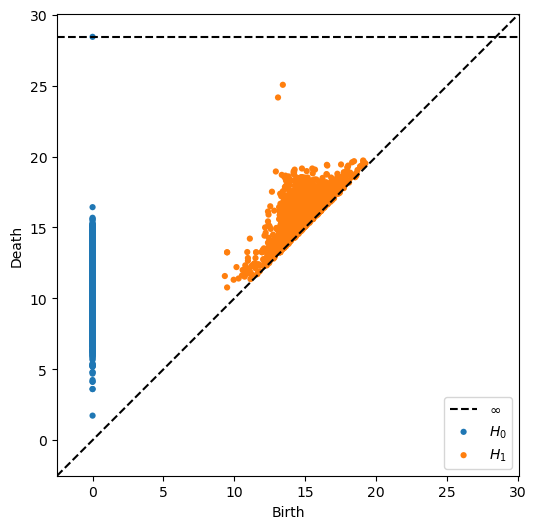

In [93]:
output = ripser(M2, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [94]:
persistent_H1_intervals(output)

{(13.416407585144043, 25.05992889404297): 11.643521308898926,
 (13.076696395874023, 24.166091918945312): 11.089395523071289,
 (12.922847747802734, 18.947296142578125): 6.024448394775391,
 (13.34166431427002, 18.70828628540039): 5.366621971130371,
 (13.601470947265625, 18.65475845336914): 5.053287506103516}

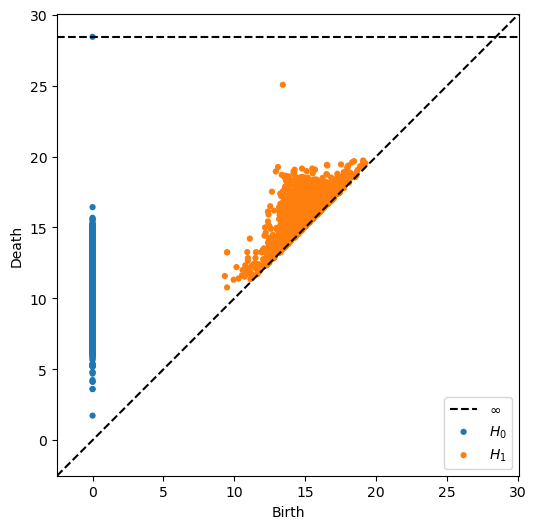

In [95]:
output = ripser(M2, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [96]:
persistent_H1_intervals(output)

{(13.416407585144043, 25.05992889404297): 11.643521308898926,
 (13.076696395874023, 19.26136016845703): 6.184663772583008,
 (12.922847747802734, 18.947296142578125): 6.024448394775391,
 (13.34166431427002, 18.70828628540039): 5.366621971130371,
 (13.601470947265625, 18.65475845336914): 5.053287506103516}

# C6

In [97]:
def p6(x,y):
    X = 1/(2 * pi) * (x + y / (3**(1/2)))
    Y = 1/(2 * pi) * 2 * y / (3**(1/2))
    C = cos(X + Y) + cos(X - 2 * Y) + cos(-2 * X + Y)
    S = sin(X + Y) +sin(X - 2*Y) +sin(-2 * X + Y)
    return C 

In [98]:
M = view_matrix(image_function = p6, num_pixels = 40 , window_size = 50, n_isos = 2000, x_translate= 1000 , y_translate=100, n_translates = 500)
M

array([[ 0.        , 81.04957101, 77.54639378, ..., 26.92431527,
        67.03927449, 67.13231058],
       [81.04957101,  0.        , 66.18354846, ..., 72.69930192,
        69.9248037 , 72.77889423],
       [77.54639378, 66.18354846,  0.        , ..., 79.69455108,
        70.03939932, 69.66054227],
       ...,
       [26.92431527, 72.69930192, 79.69455108, ...,  0.        ,
        67.29218453, 67.40032498],
       [67.03927449, 69.9248037 , 70.03939932, ..., 67.29218453,
         0.        , 76.67268892],
       [67.13231058, 72.77889423, 69.66054227, ..., 67.40032498,
        76.67268892,  0.        ]])

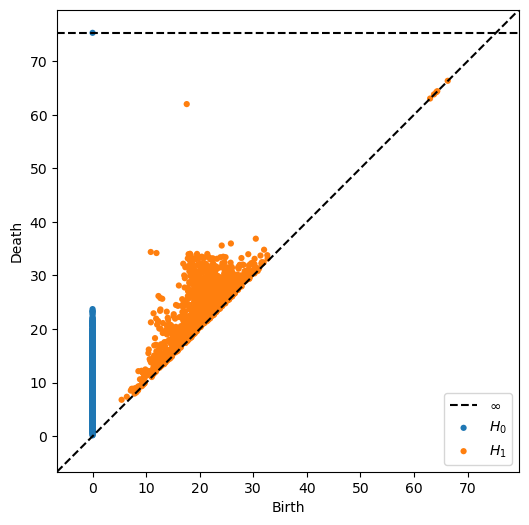

In [99]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [100]:
persistent_H1_intervals(output)

{(17.57781219482422, 61.99879837036133): 44.42098617553711,
 (10.865202903747559, 34.391273498535156): 23.526070594787598,
 (11.931039810180664, 34.193687438964844): 22.26264762878418,
 (17.920494079589844, 33.975120544433594): 16.05462646484375,
 (18.196517944335938, 34.055641174316406): 15.859123229980469}

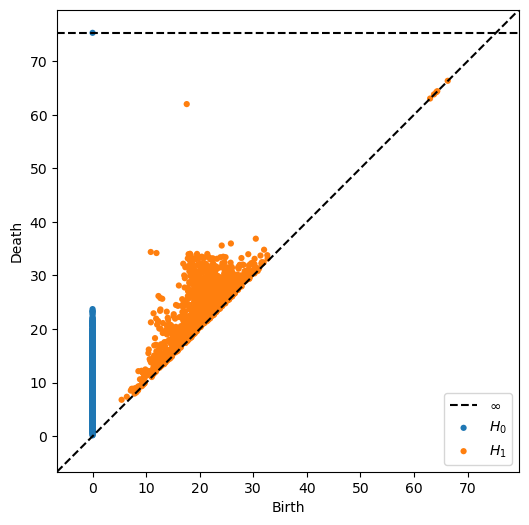

In [101]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [102]:
persistent_H1_intervals(output)

{(17.57781219482422, 61.99879837036133): 44.42098617553711,
 (10.865202903747559, 34.391273498535156): 23.526070594787598,
 (11.931039810180664, 34.193687438964844): 22.26264762878418,
 (17.920494079589844, 33.975120544433594): 16.05462646484375,
 (18.196517944335938, 34.055641174316406): 15.859123229980469}

In [103]:
M2 = mult_trans(M, n_translates = 500, scalar=2)
M2

array([[  0.        , 162.09914201, 155.09278755, ...,  26.92431527,
         67.03927449,  67.13231058],
       [162.09914201,   0.        , 132.36709692, ...,  72.69930192,
         69.9248037 ,  72.77889423],
       [155.09278755, 132.36709692,   0.        , ...,  79.69455108,
         70.03939932,  69.66054227],
       ...,
       [ 26.92431527,  72.69930192,  79.69455108, ...,   0.        ,
         67.29218453,  67.40032498],
       [ 67.03927449,  69.9248037 ,  70.03939932, ...,  67.29218453,
          0.        ,  76.67268892],
       [ 67.13231058,  72.77889423,  69.66054227, ...,  67.40032498,
         76.67268892,   0.        ]])

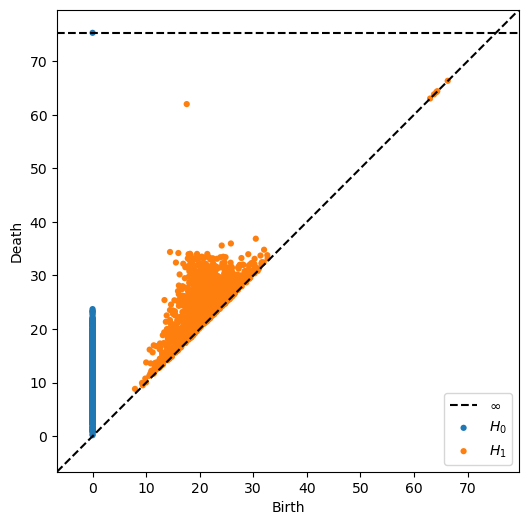

In [104]:
output = ripser(M2, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [105]:
persistent_H1_intervals(output)

{(17.57781219482422, 61.99879837036133): 44.42098617553711,
 (14.459970474243164, 34.391273498535156): 19.931303024291992,
 (16.01955795288086, 34.193687438964844): 18.174129486083984,
 (15.560641288757324, 32.41857147216797): 16.857930183410645,
 (17.920494079589844, 33.975120544433594): 16.05462646484375}

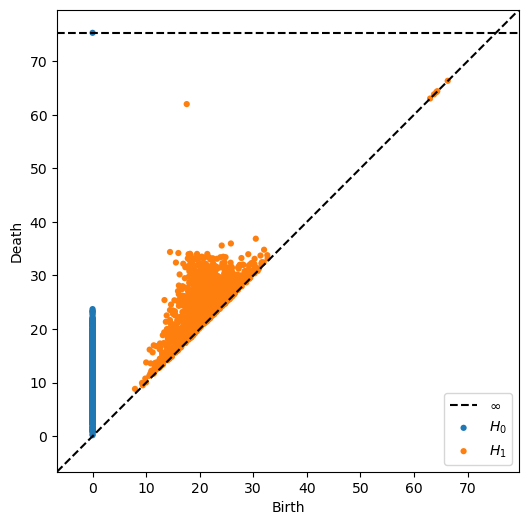

In [106]:
output = ripser(M2, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [107]:
persistent_H1_intervals(output)

{(17.57781219482422, 61.99879837036133): 44.42098617553711,
 (14.459970474243164, 34.391273498535156): 19.931303024291992,
 (16.01955795288086, 34.193687438964844): 18.174129486083984,
 (15.560641288757324, 32.41857147216797): 16.857930183410645,
 (17.920494079589844, 33.975120544433594): 16.05462646484375}